In [ ]:
from google.colab import files
files.upload()

Saving heart_failure_clinical_records_dataset.csv to heart_failure_clinical_records_dataset (2).csv


{'heart_failure_clinical_records_dataset (2).csv': b'age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT\n75,0,582,0,20,1,265000,1.9,130,1,0,4,1\n55,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1\n65,0,146,0,20,0,162000,1.3,129,1,1,7,1\n50,1,111,0,20,0,210000,1.9,137,1,0,7,1\n65,1,160,1,20,0,327000,2.7,116,0,0,8,1\n90,1,47,0,40,1,204000,2.1,132,1,1,8,1\n75,1,246,0,15,0,127000,1.2,137,1,0,10,1\n60,1,315,1,60,0,454000,1.1,131,1,1,10,1\n65,0,157,0,65,0,263358.03,1.5,138,0,0,10,1\n80,1,123,0,35,1,388000,9.4,133,1,1,10,1\n75,1,81,0,38,1,368000,4,131,1,1,10,1\n62,0,231,0,25,1,253000,0.9,140,1,1,10,1\n45,1,981,0,30,0,136000,1.1,137,1,0,11,1\n50,1,168,0,38,1,276000,1.1,137,1,0,11,1\n49,1,80,0,30,1,427000,1,138,0,0,12,0\n82,1,379,0,50,0,47000,1.3,136,1,0,13,1\n87,1,149,0,38,0,262000,0.9,140,1,0,14,1\n45,0,582,0,14,0,166000,0.8,127,1,0,14,1\n70,1,125,0,25,1,237000,1,140,0,0,15,1\n48,1,582,1,55,0,87000,1

In [ ]:
import pandas as pd
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

# **Finding Size of Data, Number of Features and Data Type**

In [ ]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


**Size of Data**: 299 Rows

**No of features**: 13 (including output variable)

In [ ]:
#The dataset is encoded. So we distinguish between categorical and numerical variables by their value counts
#Data Type of all Variables
for key in df.keys():
  print(f"{key:<{30}}\t\t{df[key].nunique()}")

age                           		47
anaemia                       		2
creatinine_phosphokinase      		208
diabetes                      		2
ejection_fraction             		17
high_blood_pressure           		2
platelets                     		176
serum_creatinine              		40
serum_sodium                  		27
sex                           		2
smoking                       		2
time                          		148
DEATH_EVENT                   		2


***Categorical Variables***
1.  Anaemia: (0 = No, 1= Yes)
2.  Diabetes (0=No, 1= Yes)
3.  High Blood Pressure (0 = No, 1= Yes)
4.  Sex (0= Female, 1 = Male)
5.  Smoking (0 = No, 1 = Yes)
6.  Death Event (Target variable, 1= Died, 0 = No)

# **Finding Null Values**

In [ ]:
df.isnull().sum() #Check for null values

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

There are no null values in this dataset

# **Performing Descriptive Analysis**

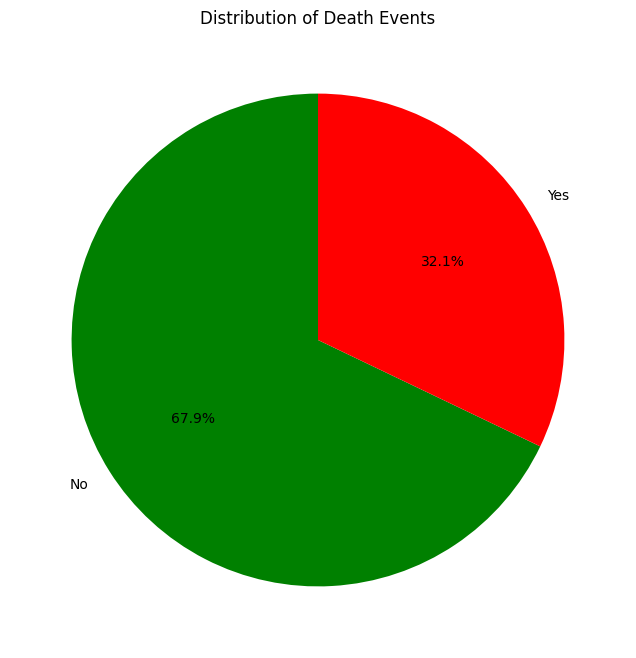

In [ ]:
from matplotlib import pyplot as plt
death_event_counts = df['DEATH_EVENT'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(death_event_counts, labels=['No', 'Yes'], autopct='%1.1f%%', colors=['green', 'red'], startangle=90)
plt.title('Distribution of Death Events')
plt.show()

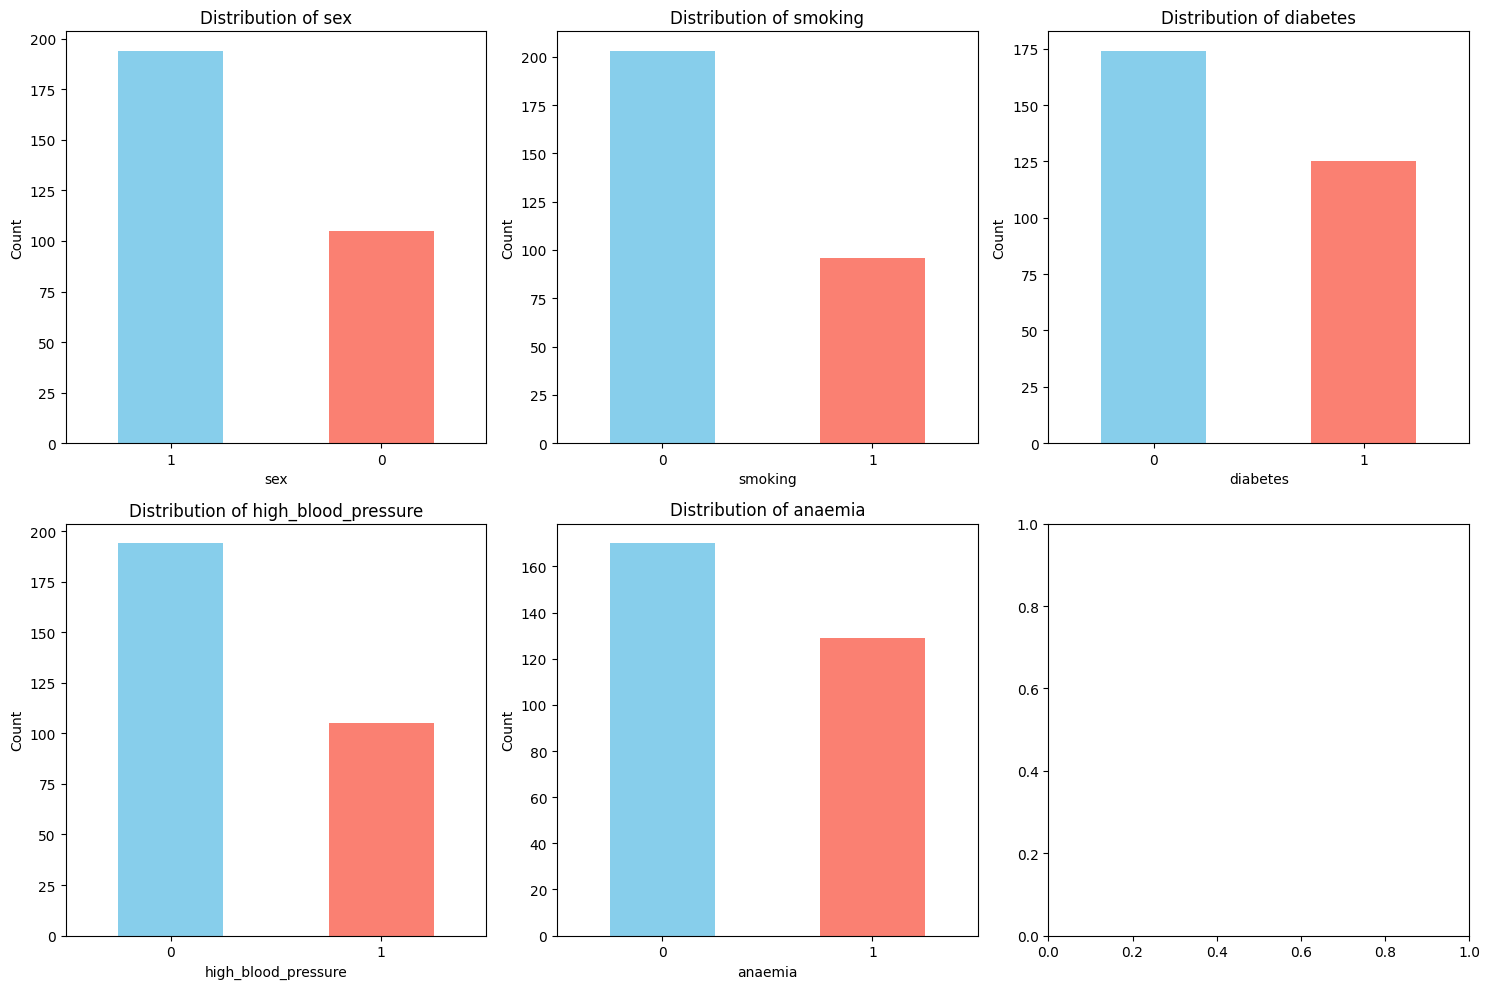

In [ ]:
cat_var = ['sex','smoking','diabetes','high_blood_pressure','anaemia']
# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(cat_var):
    ax = axes.flatten()[i]
    df[column].value_counts().plot(kind='bar', ax=ax, color=['skyblue', 'salmon'])
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

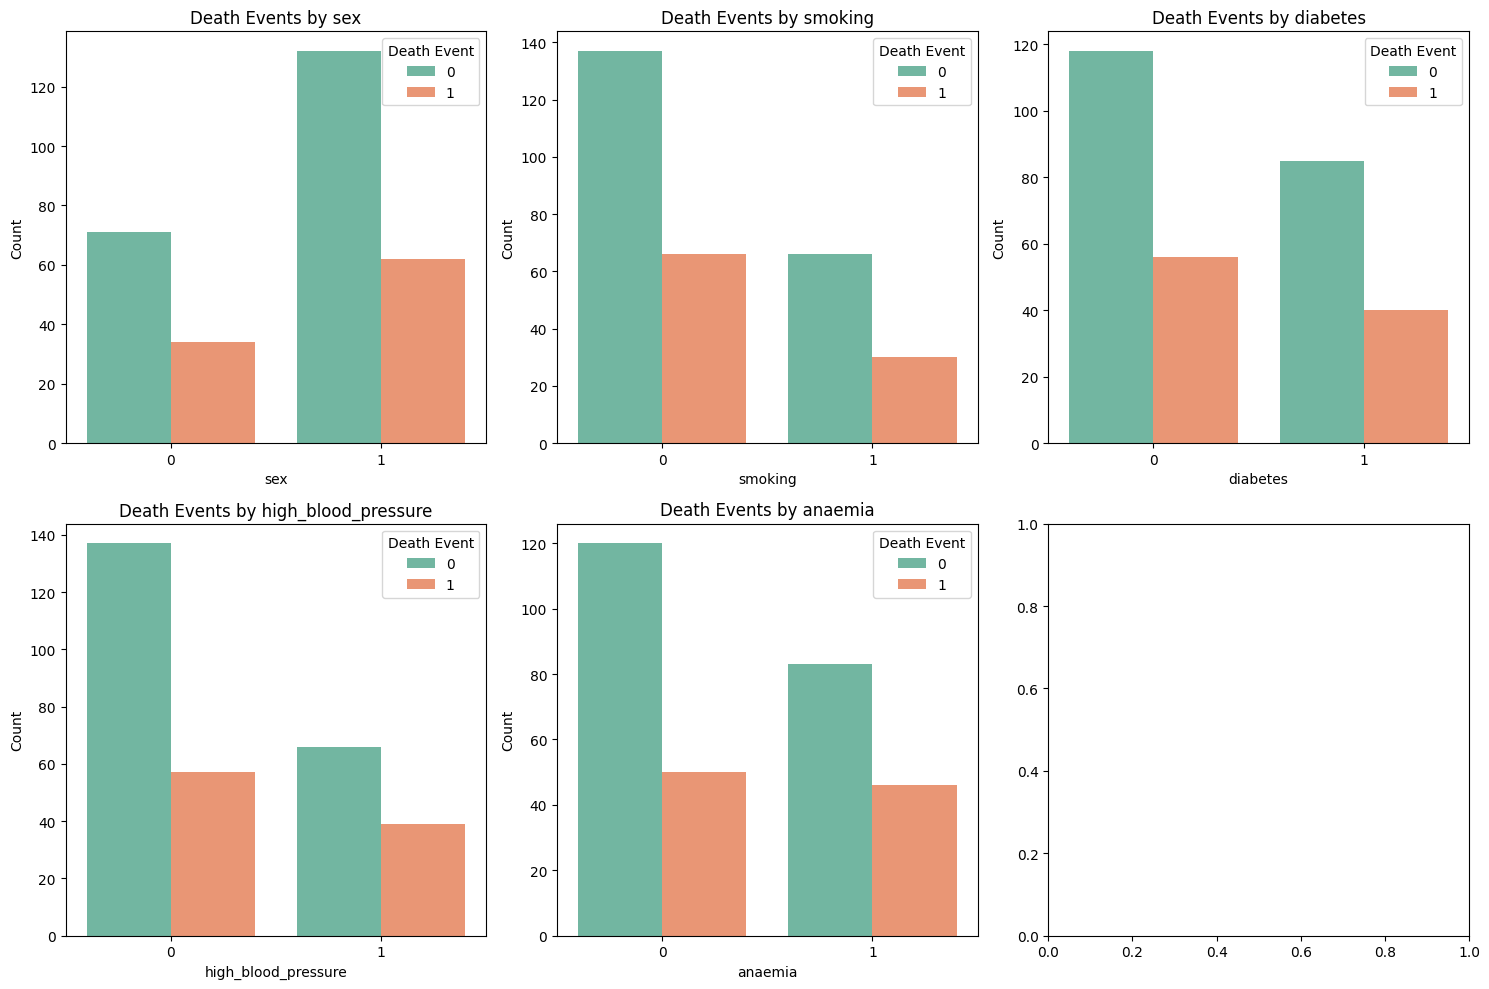

In [ ]:
import seaborn as sns
# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

for i, column in enumerate(cat_var):
    ax = axes.flatten()[i]
    sns.countplot(x=column, hue=df['DEATH_EVENT'], data=df, ax=ax, palette='Set2')
    ax.set_title(f'Death Events by {column}')
    ax.set_xlabel(column)
    ax.set_ylabel('Count')
    ax.legend(title='Death Event', loc='upper right')

plt.tight_layout()
plt.show()

Summary Statistics:
              age  creatinine_phosphokinase  ejection_fraction      platelets  \
count  299.000000                299.000000         299.000000     299.000000   
mean    60.833893                581.839465          38.083612  263358.029264   
std     11.894809                970.287881          11.834841   97804.236869   
min     40.000000                 23.000000          14.000000   25100.000000   
25%     51.000000                116.500000          30.000000  212500.000000   
50%     60.000000                250.000000          38.000000  262000.000000   
75%     70.000000                582.000000          45.000000  303500.000000   
max     95.000000               7861.000000          80.000000  850000.000000   

       serum_creatinine  serum_sodium        time  
count         299.00000    299.000000  299.000000  
mean            1.39388    136.625418  130.260870  
std             1.03451      4.412477   77.614208  
min             0.50000    113.000000    4

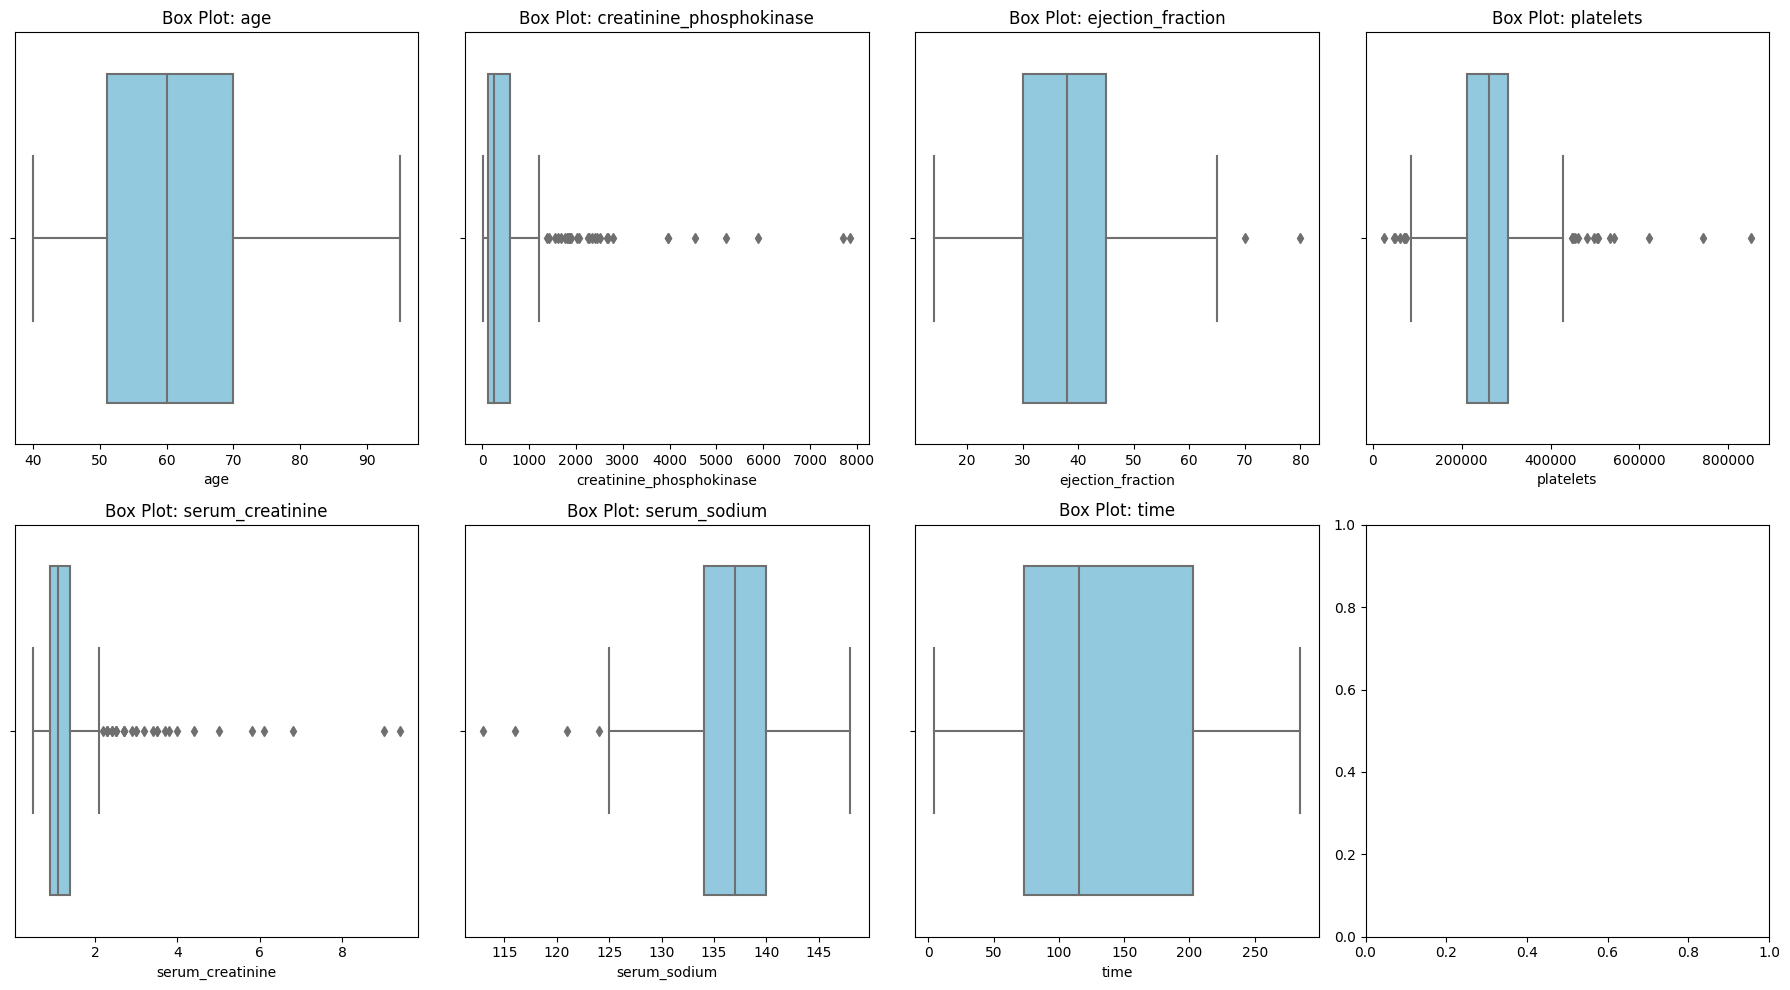

In [ ]:
num_var = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
# Calculate summary statistics
summary_statistics = df[num_var].describe()

# Display summary statistics
print("Summary Statistics:")
print(summary_statistics)

# Create subplots for box plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))

for i, column in enumerate(num_var):
    ax = axes.flatten()[i]
    sns.boxplot(x=df[column], ax=ax, color='skyblue')
    ax.set_title(f'Box Plot: {column}')
    ax.set_xlabel(column)

plt.tight_layout()
plt.show()

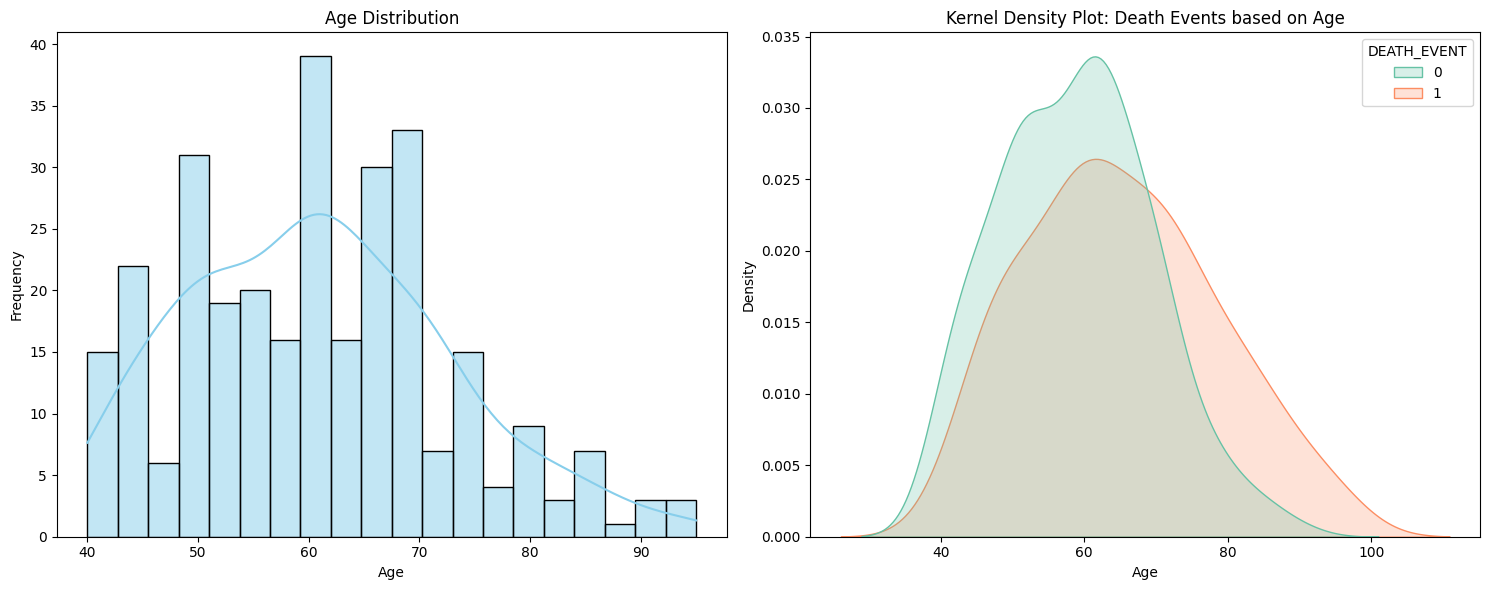

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Histogram for Age Distribution
sns.histplot(df['age'], bins=20, kde=True, color='skyblue', ax=axes[0])
axes[0].set_title('Age Distribution')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')

# Kernel Density Plot for Death Events based on Age
sns.kdeplot(data=df, x='age', hue='DEATH_EVENT', fill=True, common_norm=False, palette='Set2', ax=axes[1])
axes[1].set_title('Kernel Density Plot: Death Events based on Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Density')

plt.tight_layout()
plt.show()

# **Finding dependencies of variables**

In [ ]:
#Check correlation of numerical variable with target variable
variables_to_correlate = ['age','creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium','time']
target_variable = 'DEATH_EVENT'
correlation_result = df[[target_variable] + variables_to_correlate].corr()
correlation_result

,DEATH_EVENT,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
DEATH_EVENT,1.000000,0.253729,0.062728,-0.268603,-0.049139,0.294278,-0.195204,-0.526964
age,0.253729,1.000000,-0.081584,0.060098,-0.052354,0.159187,-0.045966,-0.224068
creatinine_phosphokinase,0.062728,-0.081584,1.000000,-0.044080,0.024463,-0.016408,0.059550,-0.009346
ejection_fraction,-0.268603,0.060098,-0.044080,1.000000,0.072177,-0.011302,0.175902,0.041729
platelets,-0.049139,-0.052354,0.024463,0.072177,1.000000,-0.041198,0.062125,0.010514
serum_creatinine,0.294278,0.159187,-0.016408,-0.011302,-0.041198,1.000000,-0.189095,-0.149315
serum_sodium,-0.195204,-0.045966,0.059550,0.175902,0.062125,-0.189095,1.000000,0.087640
time,-0.526964,-0.224068,-0.009346,0.041729,0.010514,-0.149315,0.087640,1.000000


creatinine_phosphokinase and platelets have almost no correlation with target variable

In [ ]:
spearman_corr = df[[target_variable] + variables_to_correlate].corr(method='spearman') #Check for any non-linear relation
spearman_corr

,DEATH_EVENT,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,time
DEATH_EVENT,1.000000,0.218125,0.023616,-0.286869,-0.046200,0.370630,-0.209837,-0.543179
age,0.218125,1.000000,-0.093078,0.074047,-0.052091,0.270561,-0.101716,-0.197524
creatinine_phosphokinase,0.023616,-0.093078,1.000000,-0.067839,0.060033,-0.049936,0.016886,0.125823
ejection_fraction,-0.286869,0.074047,-0.067839,1.000000,0.053696,-0.177986,0.161695,0.070533
platelets,-0.046200,-0.052091,0.060033,0.053696,1.000000,-0.051028,0.049453,-0.006927
serum_creatinine,0.370630,0.270561,-0.049936,-0.177986,-0.051028,1.000000,-0.300413,-0.160990
serum_sodium,-0.209837,-0.101716,0.016886,0.161695,0.049453,-0.300413,1.000000,0.086393
time,-0.543179,-0.197524,0.125823,0.070533,-0.006927,-0.160990,0.086393,1.000000


No non-linear relation too between DEATH_EVENT and plateletes, creatinine_phosphokinase

# **Observations**
1. Target variable of the dataset is imbalanced with 67.9% no death events and 32.1% death events
2. Data contains more number of males, whereas less number of smokers, anaemia, diabetes and high blood pressure patients. This means, that these variables are also imbalanced.
3. serum sodium, serum creaitinine, platelets, and creatinine_phosphokinase have outliers.
4. Only people aged above 40 are included in this dataset with most number having age in 60s. Among them, people till 80 have higher probabilities of surviving. However, people above 80 have more chances of death than survival. This makes the dataset inappropriate for real-world practice since it doesn't include children or adolescents.
5. There is no correlation (collinear or non-collinear) among numerical variables.

# **FACTOR ANALYSIS**
1. The analysis will only apply to numerical variables.
2. The data will need to be scaled first, and outliers need to be removed.


In [ ]:
df_copy = df.copy()
df_copy.drop(['DEATH_EVENT'],axis=1,inplace=True)
df_copy[num_var] = (df_copy[num_var] - df_copy[num_var].mean())/df_copy[num_var].std()

def impute_outliers_with_median(column):
    Q1 = df_copy[column].quantile(0.25)
    Q3 = df_copy[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identify and replace outliers with median
    outliers = (df_copy[column] < lower_bound) | (df_copy[column] > upper_bound)
    df_copy.loc[outliers, column] = df_copy[column].median()

for i in ['creatinine_phosphokinase','ejection_fraction','platelets','serum_creatinine','serum_sodium']:
  impute_outliers_with_median(i)

Imputed outliers with median values

In [ ]:
!pip install factor_analyzer

In [ ]:
num_var
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
chi2, p = calculate_bartlett_sphericity(df_copy[num_var])
print("Chi squared value : ",chi2)
print("p value : ",p)

Chi squared value :  83.54455835949133
p value :  2.0465579275048127e-09


p value less than 0.05 indicates that factor analysis can be applied to these variables

In [ ]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_vars, kmo_model = calculate_kmo(df_copy[num_var])
print(kmo_model)

0.5340031582397949


KMO score greater than 0.6 indicates that data is well suited for factor analysis, however, we can proceed since it is above 0.5

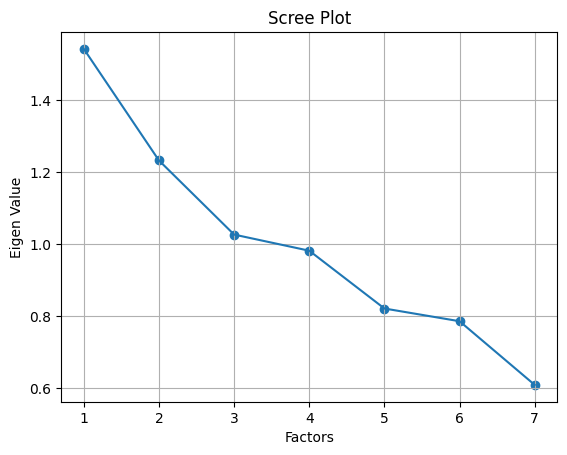

In [ ]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer(rotation = None,impute = "drop",n_factors=df_copy[num_var].shape[1])
fa.fit(df_copy[num_var])
ev,_ = fa.get_eigenvalues()
plt.scatter(range(1,df[num_var].shape[1]+1),ev)
plt.plot(range(1,df_copy[num_var].shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigen Value')
plt.grid()

Above graph shows that optimal number of factors is 3, since the eigen values are greater than 1 for this number of factors and below

In [ ]:
fa = FactorAnalyzer(n_factors=3,rotation='varimax')
fa.fit(df_copy[num_var])
print(pd.DataFrame(fa.loadings_,columns=['Factor 1','Factor 2','Factor 3'],index=df_copy[num_var].columns))

                          Factor 1  Factor 2  Factor 3
age                       0.995940  0.058473 -0.009544
creatinine_phosphokinase -0.049298  0.991690 -0.095926
ejection_fraction         0.090232 -0.011514  0.542872
platelets                -0.048145  0.010384  0.102010
serum_creatinine          0.239786  0.085988 -0.397526
serum_sodium             -0.063244 -0.034920  0.379795
time                     -0.230110  0.106961  0.133121


In [ ]:
print(pd.DataFrame(fa.get_factor_variance(),index=['Variance','Proportional Var','Cumulative Var']))

                         0         1         2
Variance          1.119235  1.007162  0.634402
Proportional Var  0.159891  0.143880  0.090629
Cumulative Var    0.159891  0.303771  0.394400


33.4% variance is explained by the 3 factors

In [ ]:
print(pd.DataFrame(fa.get_communalities(),index=df_copy[num_var].columns,columns=['Communalities']))

                          Communalities
age                            0.995407
creatinine_phosphokinase       0.995081
ejection_fraction              0.302985
platelets                      0.012832
serum_creatinine               0.222918
serum_sodium                   0.149464
time                           0.082112


Amount of each variable's variance explained by the three factors altogether. These communalitie show that age and creatinine_phosphokinase are almost completely explained by this factors, and ejection_fraction is, to some extent, explained too. However, too less variance of the other four features is explained by these factors.

In [ ]:
factor_loadings = pd.DataFrame(fa.loadings_)
import numpy as np
df_copy[['Factor 1','Factor 2','Factor 3']]=pd.DataFrame(np.dot(df_copy[num_var],factor_loadings), columns=['Factor1', 'Factor2', 'Factor3'])

In [ ]:
df_copy.drop(num_var,axis=1,inplace=True)

In [ ]:
df_copy['DEATH_EVENT'] = df['DEATH_EVENT']

# **Data Preparation**

In [ ]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Assuming you have a DataFrame 'df' with features and labels
# X contains the features, y contains the labels
y = df_copy['DEATH_EVENT']
X = df_copy.drop(['DEATH_EVENT'],axis=1)
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Apply SMOTE to the training data only to avoid data leakage
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

# Now, X_train_resampled and y_train_resampled contain the oversampled data

# **Building and Training Neural Network with 2 Layers of size 5**

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(8,)))

# First hidden layer with 3 neurons and ReLU activation
model.add(layers.Dense(5, activation='relu'))

# Second hidden layer with 3 neurons and ReLU activation
model.add(layers.Dense(5, activation='relu'))

# Output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Display the model architecture
model.summary()


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 5)                 45        
                                                                 
 dense_32 (Dense)            (None, 5)                 30        
                                                                 
 dense_33 (Dense)            (None, 1)                 6         
                                                                 
Total params: 81 (324.00 Byte)
Trainable params: 81 (324.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

# Assuming you have your training data (X_train, y_train) ready
early_stopping = EarlyStopping(monitor='val_loss', patience=40, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=600, batch_size=64, validation_data=(X_test,y_test), callbacks=[early_stopping])

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

Epoch 1/600
6/6 [==============================] - 1s 59ms/step - loss: 0.7047 - accuracy: 0.4486 - val_loss: 0.6964 - val_accuracy: 0.5000
Epoch 2/600
6/6 [==============================] - 0s 13ms/step - loss: 0.7017 - accuracy: 0.4622 - val_loss: 0.6933 - val_accuracy: 0.5333
Epoch 3/600
6/6 [==============================] - 0s 15ms/step - loss: 0.6992 - accuracy: 0.4757 - val_loss: 0.6899 - val_accuracy: 0.5667
Epoch 4/600
6/6 [==============================] - 0s 13ms/step - loss: 0.6968 - accuracy: 0.4892 - val_loss: 0.6867 - val_accuracy: 0.5667
Epoch 5/600
6/6 [==============================] - 0s 18ms/step - loss: 0.6948 - accuracy: 0.4919 - val_loss: 0.6840 - val_accuracy: 0.5667
Epoch 6/600
6/6 [==============================] - 0s 13ms/step - loss: 0.6927 - accuracy: 0.5054 - val_loss: 0.6813 - val_accuracy: 0.5667
Epoch 7/600
6/6 [==============================] - 0s 17ms/step - loss: 0.6907 - accuracy: 0.5027 - val_loss: 0.6790 - val_accuracy: 0.6000
Epoch 8/600
6/6 [===

In [ ]:
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix, classification_report
# Calculate precision, recall, and F1 score
classification_rep = classification_report(y_test,np.round(y_pred))
print("Classification Report:")
print(classification_rep)

1/1 [==============================] - 0s 87ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74        18
           1       0.62      0.67      0.64        12

    accuracy                           0.70        30
   macro avg       0.69      0.69      0.69        30
weighted avg       0.70      0.70      0.70        30



# **Building and Training Neural Network with 2 Layers of size 5 and 2 layers of size 3**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(8,)))

# First hidden layer with 5 neurons and ReLU activation
model.add(layers.Dense(5, activation='relu'))

# Second hidden layer with 5 neurons and ReLU activation
model.add(layers.Dense(5, activation='relu'))

# Second hidden layer with 5 neurons and ReLU activation
model.add(layers.Dense(3, activation='relu'))

# Second hidden layer with 5 neurons and ReLU activation
model.add(layers.Dense(3, activation='relu'))


# Output layer
model.add(layers.Dense(1, activation='sigmoid'))

# Display the model architecture
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_34 (Dense)            (None, 5)                 45        
                                                                 
 dense_35 (Dense)            (None, 5)                 30        
                                                                 
 dense_36 (Dense)            (None, 3)                 18        
                                                                 
 dense_37 (Dense)            (None, 3)                 12        
                                                                 
 dense_38 (Dense)            (None, 1)                 4         
                                                                 
Total params: 109 (436.00 Byte)
Trainable params: 109 (436.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Assuming you have your training data (X_train, y_train) ready
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data = (X_test,y_test), callbacks=[early_stopping])

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

Epoch 1/500
6/6 [==============================] - 1s 43ms/step - loss: 0.6941 - accuracy: 0.5027 - val_loss: 0.6945 - val_accuracy: 0.4333
Epoch 2/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6938 - accuracy: 0.5243 - val_loss: 0.6941 - val_accuracy: 0.4667
Epoch 3/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6937 - accuracy: 0.5378 - val_loss: 0.6938 - val_accuracy: 0.4667
Epoch 4/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6934 - accuracy: 0.5568 - val_loss: 0.6937 - val_accuracy: 0.4333
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.6933 - accuracy: 0.5676 - val_loss: 0.6935 - val_accuracy: 0.4333
Epoch 6/500
6/6 [==============================] - 0s 10ms/step - loss: 0.6931 - accuracy: 0.5595 - val_loss: 0.6934 - val_accuracy: 0.4667
Epoch 7/500
6/6 [==============================] - 0s 8ms/step - loss: 0.6930 - accuracy: 0.5676 - val_loss: 0.6934 - val_accuracy: 0.4667
Epoch 8/500
6/6 [========

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 74ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Calculate precision, recall, and F1 score
classification_rep = classification_report(y_test,np.round(y_pred))
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74        18
           1       0.60      0.50      0.55        12

    accuracy                           0.67        30
   macro avg       0.65      0.64      0.64        30
weighted avg       0.66      0.67      0.66        30



Text(0.5, 0, 'Epoch')

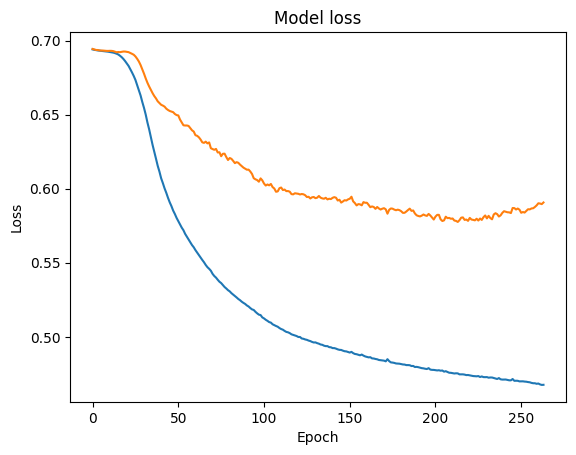

In [ ]:
# Plot training & validation loss values
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# **Results**
  Both designs have nearly same accuracy and F1 score, that is 77% accuracy and 74-75% F1-score. Since our test set is imbalanced, F1-score should be our focus metric. The difference between training and validation loss above shows that the model is overfitting

# **Optimization Tips**
1. Perform inferential statistics tests to assess the dependency of categorical variables with target variable, and remove them if there's no significant relation to simplify the model and remove noise
2. The KMO model's value of 0.53 shows that our data is not suitable for Factor Analysis, yet, we still did it. A better approach would be manual feature engineering.
3. The dataset is too small for training. The model may only be capturing noise. Dataset needs to be increased by further research.


# **Experimenting with different parameters (Two hidden layers of size 8)**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential()

# Input layer
model.add(layers.InputLayer(input_shape=(8,)))

# First hidden layer with 12 neurons and ReLU activation
model.add(layers.Dense(8, activation='relu'))
# Second hidden layer with 12 neurons and ReLU activation
model.add(layers.Dense(8,activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

# Display the model architecture
model.summary()


In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# Assuming you have your training data (X_train, y_train) ready
early_stopping = EarlyStopping(monitor='val_loss', patience=50, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train, y_train, epochs=500, batch_size=64, validation_data = (X_test,y_test), callbacks=[early_stopping])

# Access training history
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

In [ ]:
y_pred = model.predict(X_test)

1/1 [==============================] - 0s 203ms/step


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
# Calculate precision, recall, and F1 score
classification_rep = classification_report(y_test,np.round(y_pred))
print("Classification Report:")
print(classification_rep)

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79        18
           1       0.70      0.58      0.64        12

    accuracy                           0.73        30
   macro avg       0.72      0.71      0.71        30
weighted avg       0.73      0.73      0.73        30



Text(0.5, 0, 'Epoch')

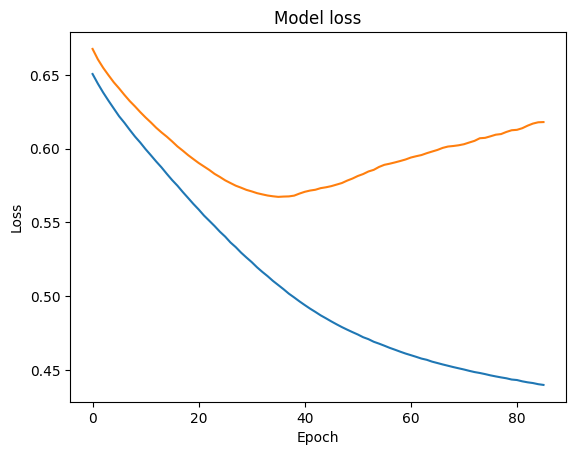

In [ ]:
# Plot training & validation loss values
plt.plot(train_loss)
plt.plot(val_loss)
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')

# **Findings**
Using two hidden layers of size 8 produces better results in terms of both F1-score as well as accuracy. One reason for this could be that using 8 units allows the model to learn more complex patterns. However, with this small dataset, the model is highly susceptible to overfitting in all cases, which is shown by the loss vs epoch graphs in which the validation curve starts to increase after a minima whereas the training curve continues to go down.